In [3]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 32.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


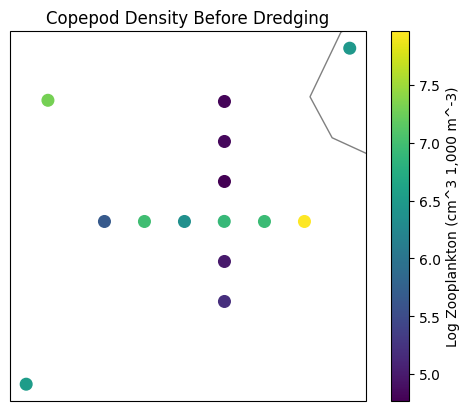

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load data from CSV
file_path1 = '/content/cape_fear_station_names.csv'
data_table1 = pd.read_csv(file_path1)

# Extract relevant columns
sta = data_table1['sta']
lat = data_table1['lat']
lon = data_table1['lon']
cop_bef = data_table1['copepod_bef']
cop_dur = data_table1['copepod_during']
cop_aft = data_table1['copepod_after']

# Plotting Heatmap for Before Dredging
min_z = np.min(np.log(cop_bef))
max_z = np.max(np.log(cop_bef))

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='gray')
sc = ax.scatter(lon, lat, s=70, c=np.log(cop_bef), cmap='viridis')
plt.colorbar(sc, label='Log Zooplankton (cm^3 1,000 m^-3)')
plt.title('Copepod Density Before Dredging')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


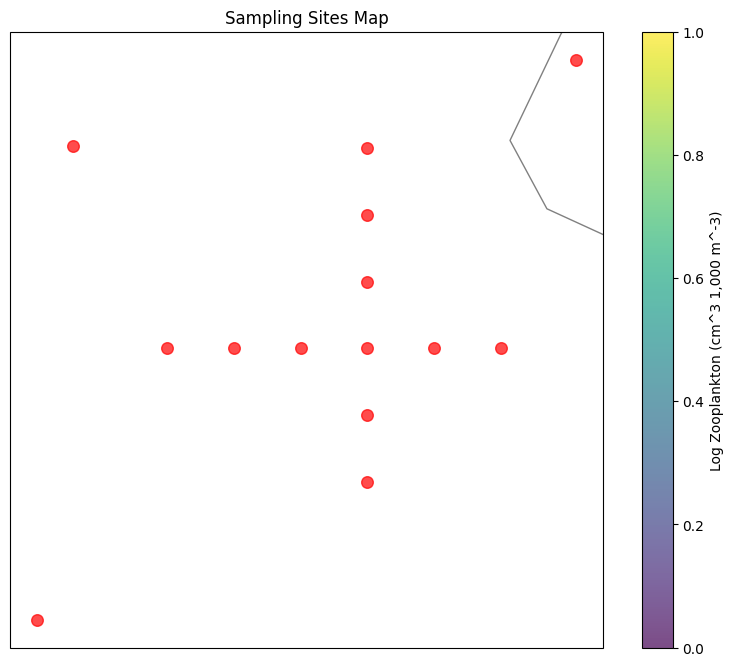

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load data from CSV
file_path1 = '/content/cape_fear_station_names.csv'
data_table1 = pd.read_csv(file_path1)

# Extract relevant columns
sta = data_table1['sta']
lat = data_table1['lat']
lon = data_table1['lon']
cop_bef = data_table1['copepod_bef']
cop_dur = data_table1['copepod_during']
cop_aft = data_table1['copepod_after']

# Plotting Map with Sampling Sites
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='gray')
plt.scatter(lon, lat, s=70, c='red', marker='o', alpha=0.7, transform=ccrs.PlateCarree())
plt.colorbar(label='Log Zooplankton (cm^3 1,000 m^-3)')
plt.title('Sampling Sites Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


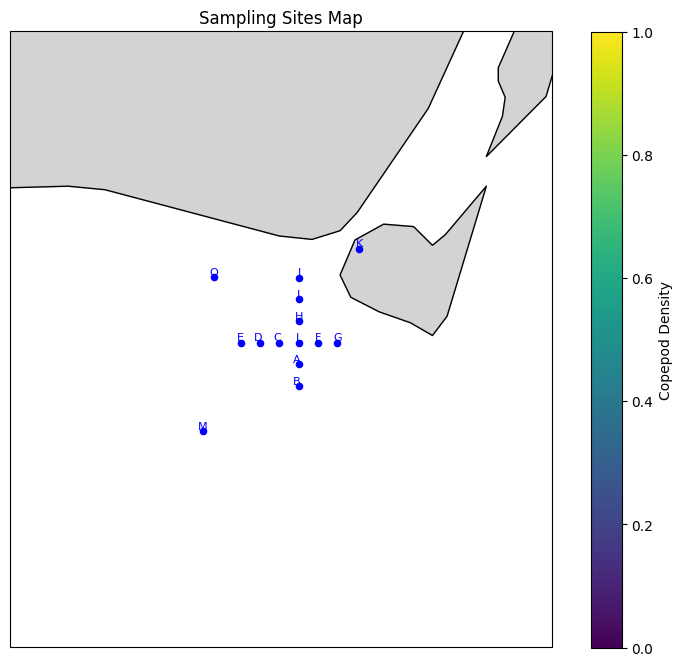

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data from CSV file
file_path = '/content/cape_fear_station_names.csv'
data_table = pd.read_csv(file_path)

# Extracting data from the DataFrame
sta = data_table['sta']
lat = data_table['lat']
lon = data_table['lon']
cop_bef = data_table['copepod_bef']
cop_dur = data_table['copepod_during']
cop_aft = data_table['copepod_after']

# Plotting map with sampling sites
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Miller())

# Add coastline and land features
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.LAND, color='lightgray')

# Plot station locations
sc = ax.scatter(lon, lat, s=20, c='blue', marker='o', transform=ccrs.PlateCarree())

# Add station labels
for i, txt in enumerate(sta):
    ax.text(lon[i], lat[i], txt, color='blue', fontsize=8, ha='center', va='bottom', transform=ccrs.PlateCarree())

# Set map extent
ax.set_extent([min(lon) - 0.1, max(lon) + 0.1, min(lat) - 0.1, max(lat) + 0.1])

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Copepod Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sampling Sites Map')
plt.show()

# Now, for the heatmaps and ANOVA, you would need additional libraries such as seaborn, scipy, etc.
# These would require separate code snippets and setups depending on your specific data and requirements.


ANOVA Results:
F-Statistic: nan
P-Value: nan


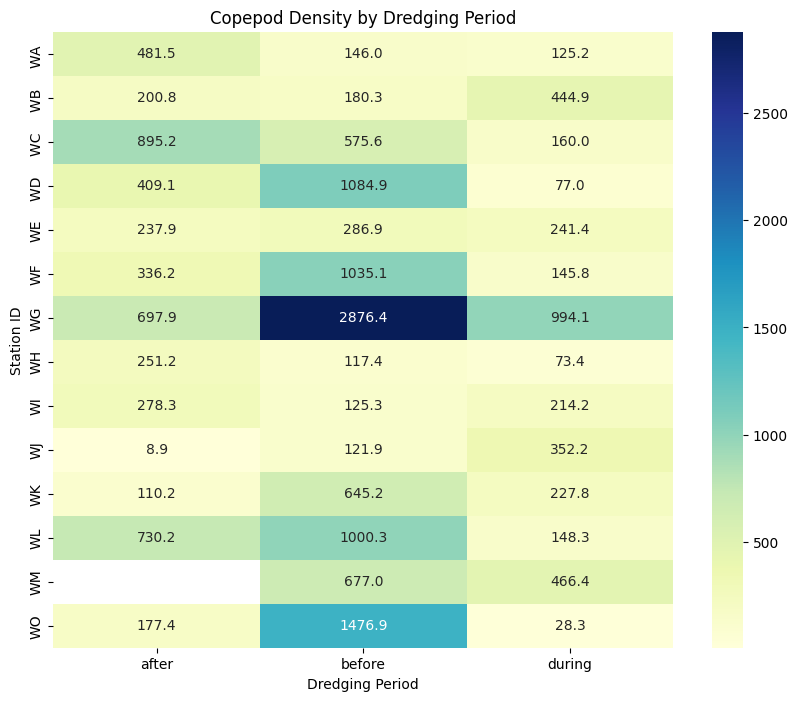

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Load data from CSV file for ANOVA
file_path2 = '/content/cape_fear_copepod_anova.csv'
data_table2 = pd.read_csv(file_path2)

# Extracting data for ANOVA
sta_anova = data_table2['sta']
cop_den = data_table2['copepod_density']
dre_per = data_table2['dredge_period']

# Perform ANOVA
f_statistic, p_value = f_oneway(cop_den[dre_per == 'before'], cop_den[dre_per == 'during'], cop_den[dre_per == 'after'])

# Display ANOVA results
print('ANOVA Results:')
print('F-Statistic:', f_statistic)
print('P-Value:', p_value)

# Define data for heatmap
heatmap_data = data_table2.pivot(index='sta', columns='dredge_period', values='copepod_density')

# Create heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Copepod Density by Dredging Period')
plt.xlabel('Dredging Period')
plt.ylabel('Station ID')
plt.show()


In [15]:
# Interpret ANOVA results
if p_value < 0.05:
    print('The means are significantly different (reject null hypothesis).')
else:
    print('The means are not significantly different (fail to reject null hypothesis).')

The means are not significantly different (fail to reject null hypothesis).


In [11]:
import pandas as pd
from scipy.stats import f_oneway

# Load data from CSV
file_path2 = '/content/cape_fear_copepod_anova.csv'
data_table2 = pd.read_csv(file_path2)

# Extract relevant columns
sta = data_table2['sta']
cop_den = data_table2['copepod_density']
dre_per = data_table2['dredge_period']  # Assuming 'dredge_period' column is present

# Performing ANOVA
# Convert categorical data to numeric for ANOVA
dre_per_numeric = pd.Categorical(dre_per, categories=['before', 'during', 'after'])
# Perform ANOVA
f_statistic, p_value = f_oneway(cop_den[dre_per_numeric == 0], cop_den[dre_per_numeric == 1], cop_den[dre_per_numeric == 2])

# Interpret ANOVA results
if p_value < 0.05:
    print('The means are significantly different (reject null hypothesis).')
else:
    print('The means are not significantly different (fail to reject null hypothesis).')


The means are not significantly different (fail to reject null hypothesis).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
